# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

url_link = "https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz"

wine_df = pd.read_csv(url_link, sep = "\t")

wine_df = wine_df.dropna()

wine_df_sample = wine_df.sample(10, random_state = 18)
wine_df_sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1363,8.0,0.830,0.27,2.0,0.080,11.0,63.0,0.99652,3.29,0.48,9.8,4
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
739,9.0,0.690,0.00,2.4,0.088,19.0,38.0,0.99900,3.35,0.60,9.3,5
1366,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8,5
901,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.8,7
330,10.2,0.360,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5,6
839,6.0,0.500,0.04,2.2,0.092,13.0,26.0,0.99647,3.46,0.47,10.0,5
246,7.1,0.680,0.07,1.9,0.075,16.0,51.0,0.99685,3.38,0.52,9.5,5
1097,8.6,0.520,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5
506,10.4,0.240,0.46,1.8,0.075,6.0,21.0,0.99760,3.25,1.02,10.8,7


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [4]:
# Dataset Columns and Description

print(wine_df.columns)
wine_df.describe()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'target'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### <ins>**Columns Description**</ins>

##### **1) <ins>Fixed Acidity**</ins> = It is the amount of non-volatile acids (mainly tartaric acid) present in the wine. These acids are responsible for the wine to taste sharp, tart and don't evaporate easily. Higher values of fixed acidity implies more acidic wine.

##### **2) <ins>Volatile Acidity**</ins> = The amount of acetic acids and other acids that can evaporate. High values of these cause the wine to have an unpleasant vinegar like taste and smell. Prefarable to have lesser values.

##### **3) <ins>Citric Acid**</ins> = This is a weak acid that gives the wine a citric flavor and brings freshness. Sometimes winemakers add citric acid to wines to brighten them.

##### **4) <ins>Residual Sugar**</ins> = Residual sugar is the amount of sugar left in the wine after the process of fermentation stops. Usually it is very low in dry wines like red wine. Higher values would indicate a sweeter wine.

##### **5) <ins>Chlorides**</ins> = This indicates the salt content (Sodium Chloride and others) present in the wine. Too much chlorides makes the wine taste salty or harsh.

##### **6) <ins>Free sulphur dioxide**</ins> = It is the amounnt of SO2 not bound to other molecules. It protects the wine from spoilage and oxidation as it acts like a preservative and antioxidant.

##### **7) <ins>Total sulphur dioxide**</ins> = Total sulphur dioxide present in the wine, including the free and bound forms. High amounts can cause a chemical smell and it is regulated as people are sensitive to it.

##### **8) <ins>Density**</ins> = How thick/dense the wine is compared to water. It is influenced by alcohol and sugar content, higher sugar or lower alcohol increases the density.

##### **9) <ins>pH**</ins> = This value measures how acidic or basic the wine is on a standard scale of 0 to 14. Lower the pH, more acidic is the wine. Typical red wines have a pH between 3 and 4.

##### **10) <ins>Sulphates**</ins> = This refers to the potassium sulphate or other sulphate compounds added by the winemakers. They are useful in preservation and enhancing the flavor.

##### **11) <ins>Alcohol**</ins> = The percentage of alcohol in wine by volume (% ABV). Higher alcohol percentages gives a warmer mouthfeel and can give a perception of sweetness.

##### **12) <ins>Target (Quality)**</ins> = A score given most probably by wine experts on a scale of 0 to 10. In this red wine dataset, the wines are rated between 3 and 8. Higher scores means better overall quality of the wine. This is the feature we will try to predict.

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [5]:
# Structure of Dataset

print("The shape of the dataset :", wine_df.shape)
print("The columns in the dataset :", wine_df.columns.tolist())
print("The datatypes of the columns:")
print(wine_df.dtypes)

The shape of the dataset : (1599, 12)
The columns in the dataset : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']
The datatypes of the columns:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
target                    int64
dtype: object


##### The red wine dataset has 1599 rows and 12 columns. All the input columns have a datatype of float64 and output variable is int64.

In [6]:
# Checking for Missing Data

print("Missing values per column :")
print(wine_df.isnull().sum())
print("\nTotal missing values in the dataset :", wine_df.isnull().sum().sum())

Missing values per column :
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

Total missing values in the dataset : 0


##### There is no missing data in the red wine dataset.

In [7]:
# Dataset Summary Statistics

wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


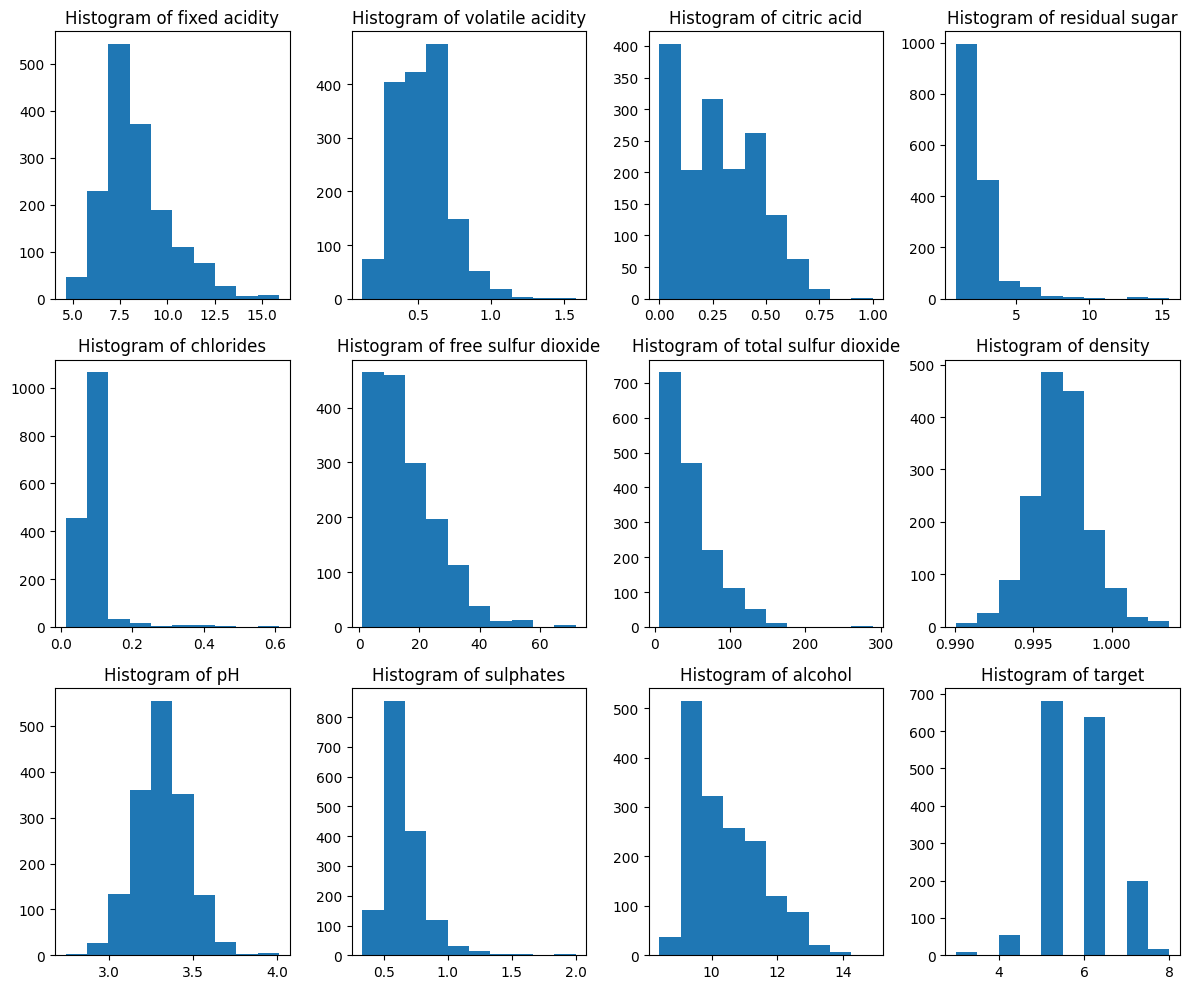

In [8]:
# Histograms for every column

plt.figure(figsize = (12,10))
for i, col in enumerate(wine_df.columns,1):
    plt.subplot(3,4,i)
    plt.hist(wine_df[col])
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

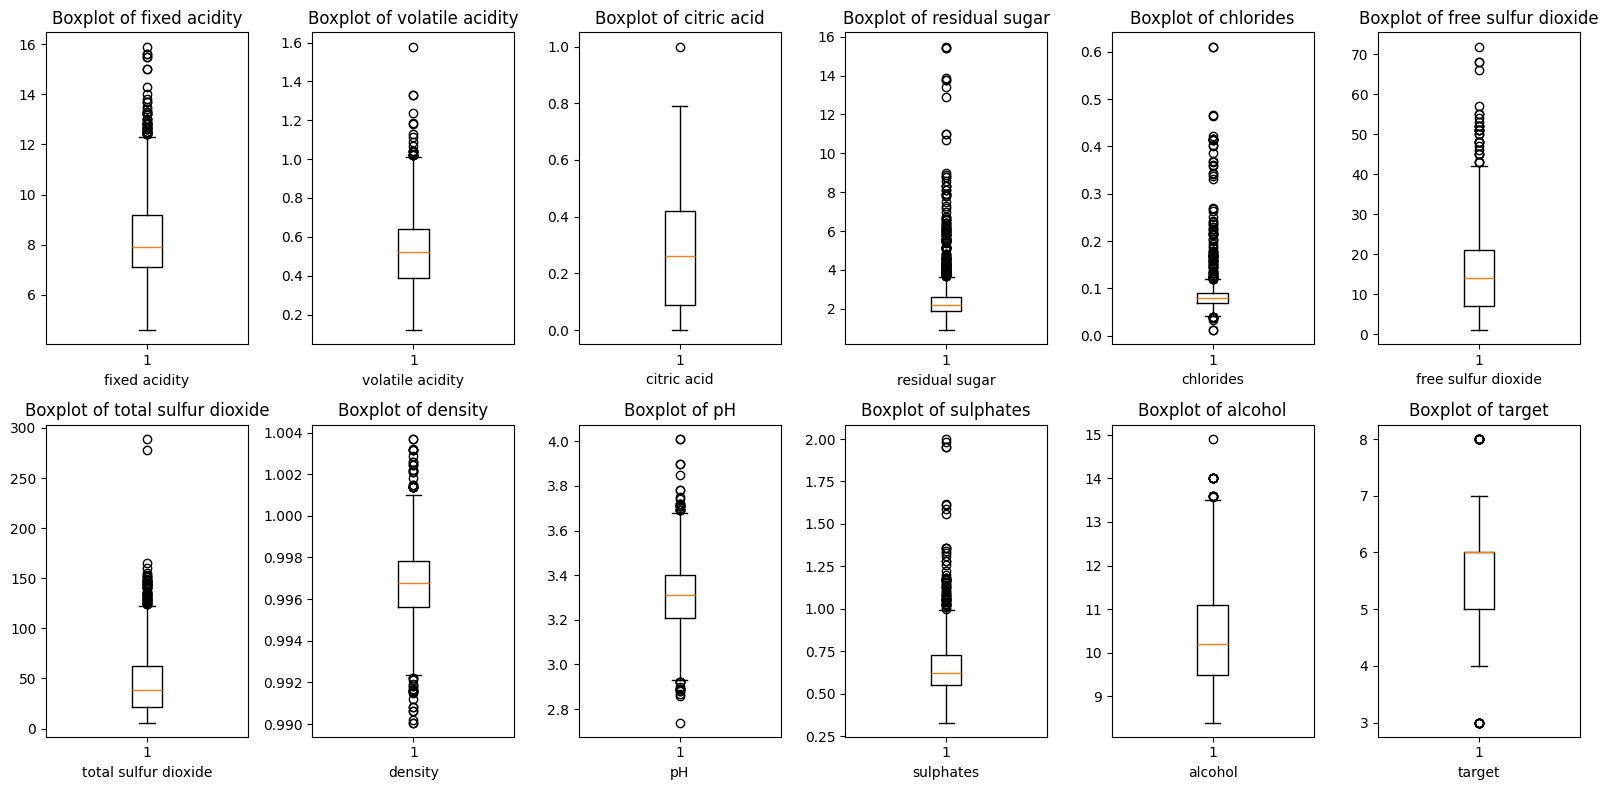

In [9]:
# Check for outliers using boxplots

plt.figure(figsize = (16,8))
for i, col in enumerate(wine_df.columns,1):
    plt.subplot(2,6,i)
    plt.boxplot(wine_df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

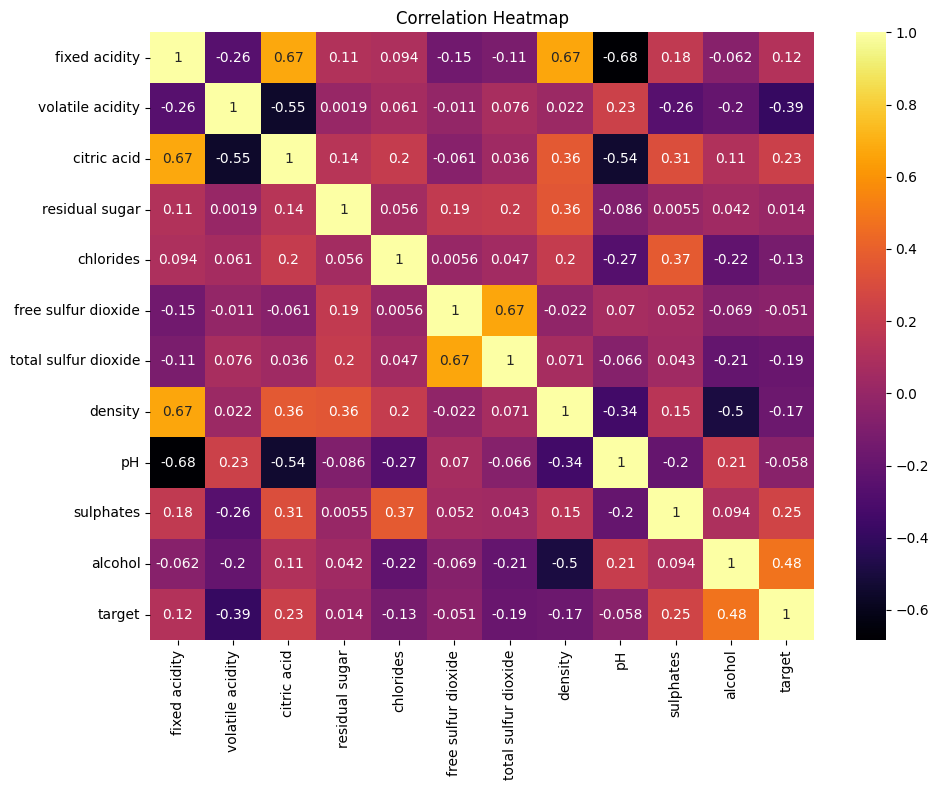

In [10]:
# Correlation Heatmap
import seaborn as sns

corr = wine_df.corr(numeric_only = True)

plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = "inferno")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

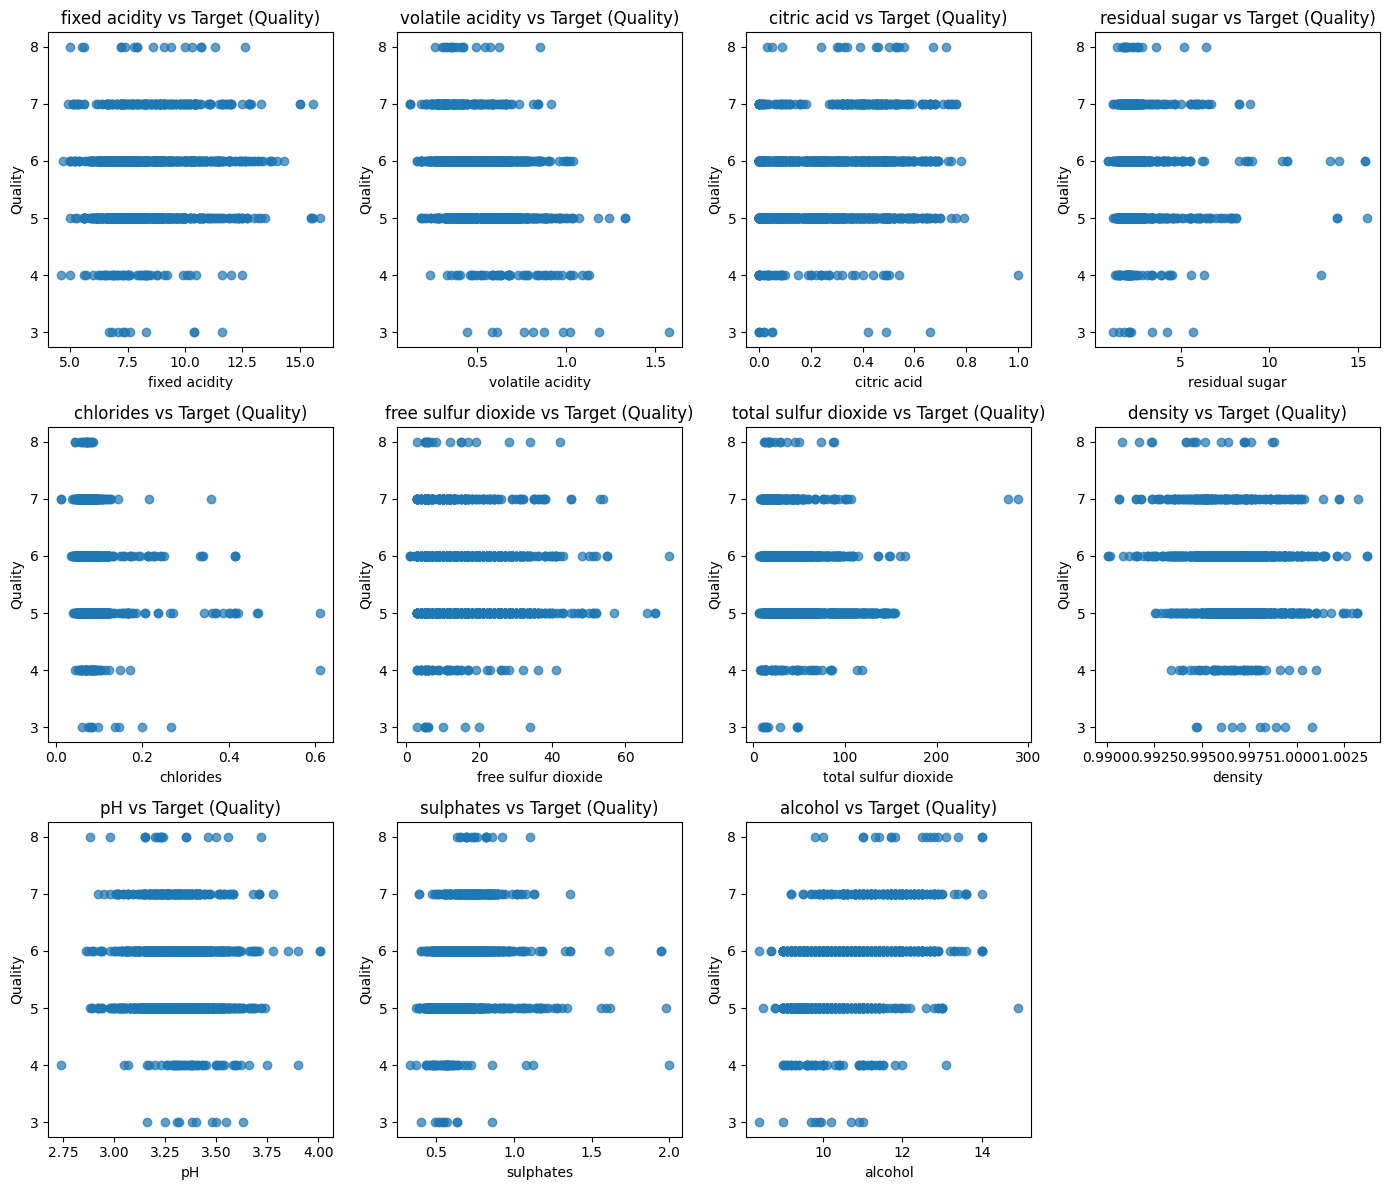

In [11]:
# Input Columns vs Target (Quality)

plt.figure(figsize = (14,12))
for i, col in enumerate(wine_df.columns[:-1],1):
    plt.subplot(3,4,i)
    plt.scatter(wine_df[col], wine_df["target"], alpha = 0.7)
    plt.title(f"{col} vs Target (Quality)")
    plt.xlabel(col)
    plt.ylabel("Quality")
plt.tight_layout()
plt.show()

In [12]:
# Finding columns with high correlation
high_correlation = wine_df.corr().abs()
high_correlation = high_correlation.unstack()
high_correlation = high_correlation[high_correlation > 0.45]
high_correlation = high_correlation[high_correlation < 1]
high_correlation = high_correlation.sort_values(ascending = False)

print("Strong input pairs with |Pearson coefficient| > 0.45")
high_correlation

Strong input pairs with |Pearson coefficient| > 0.45


fixed acidity         pH                      0.682978
pH                    fixed acidity           0.682978
citric acid           fixed acidity           0.671703
fixed acidity         citric acid             0.671703
density               fixed acidity           0.668047
fixed acidity         density                 0.668047
free sulfur dioxide   total sulfur dioxide    0.667666
total sulfur dioxide  free sulfur dioxide     0.667666
volatile acidity      citric acid             0.552496
citric acid           volatile acidity        0.552496
                      pH                      0.541904
pH                    citric acid             0.541904
density               alcohol                 0.496180
alcohol               density                 0.496180
                      target                  0.476166
target                alcohol                 0.476166
dtype: float64

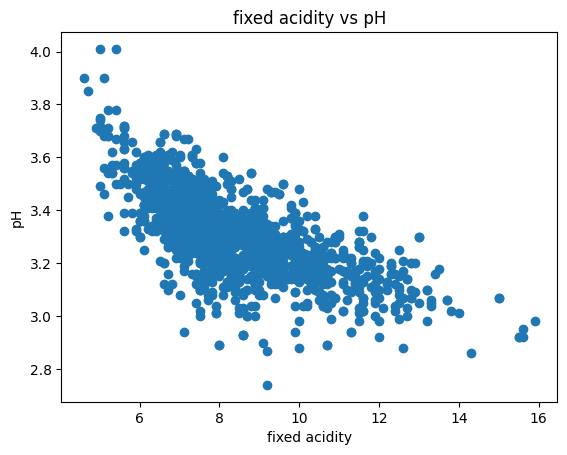

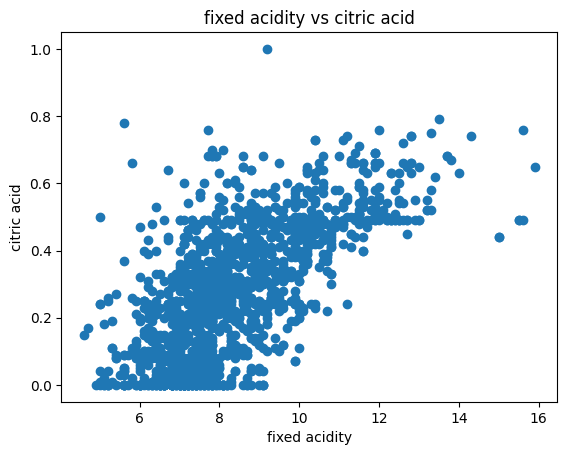

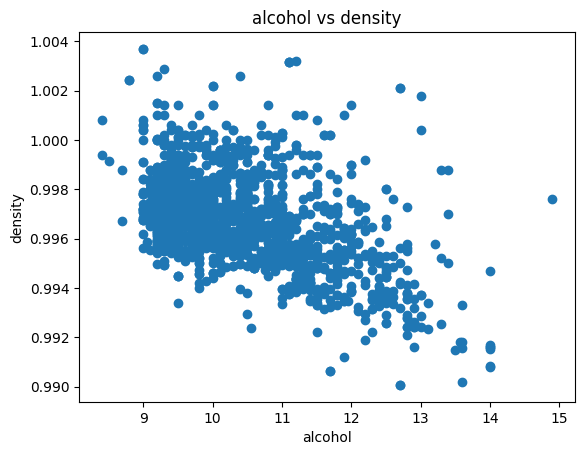

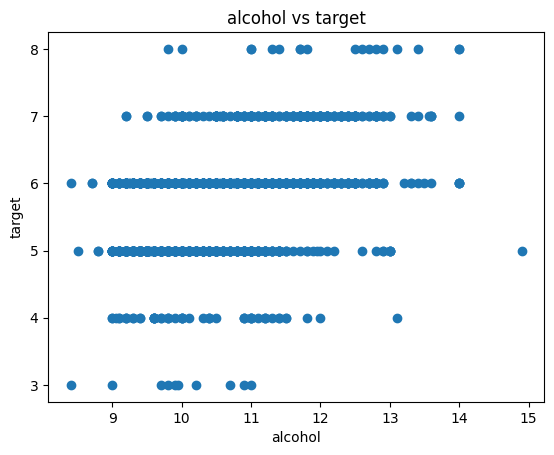

In [13]:
# Plotting some High correlation pairs

best_pairs = [("fixed acidity", "pH"), ("fixed acidity", "citric acid"), ("alcohol", "density"), ("alcohol", "target")]

for i,j in best_pairs:
    plt.figure()
    plt.scatter(wine_df[i], wine_df[j])
    plt.xlabel(i)
    plt.ylabel(j)
    plt.title(f"{i} vs {j}")
    plt.show()

## **4 INDIVIDUAL CHARTS THAT ARE INTERESTING** (Sorry for one extra)

### **1) ALCOHOL VS TARGET (QUALITY)**

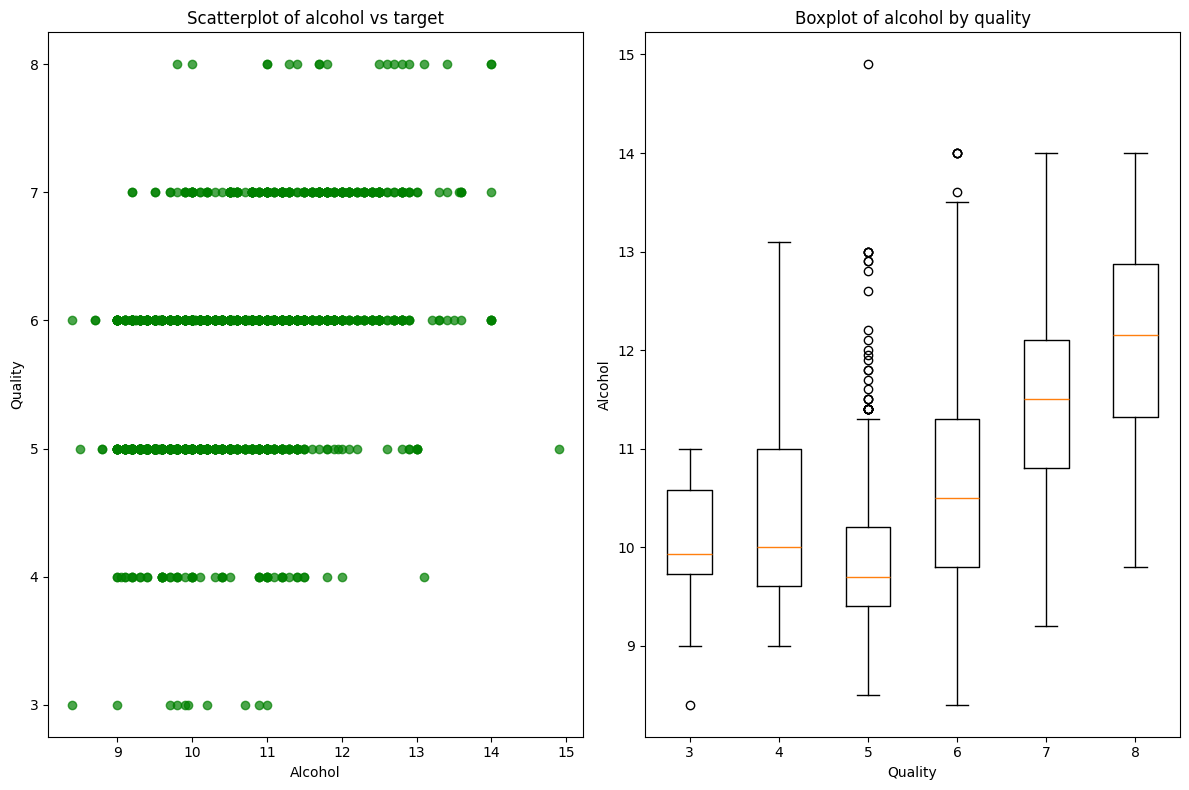

In [14]:
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)

plt.scatter(wine_df["alcohol"], wine_df["target"], color = "green", alpha = 0.7)
plt.title("Scatterplot of alcohol vs target")
plt.xlabel("Alcohol")
plt.ylabel("Quality")

plt.subplot(1,2,2)

grouped_info = [wine_df[wine_df["target"] == i]["alcohol"] for i in sorted(wine_df["target"].unique())]
plt.boxplot(grouped_info, tick_labels = sorted(wine_df["target"].unique()))
plt.title("Boxplot of alcohol by quality")
plt.xlabel("Quality")
plt.ylabel("Alcohol")

plt.tight_layout()
plt.show()

##### **The above scatter plot and boxplot show a strong positive relationship between alcohol and target (quality).**
**a) The scatter plot reveals an upward trend, which indicates to us that higher alcohol generally means higher quality of wine.**

**b) The boxplot even further proves this point as we can clearly see that higher quality wine (6 to 8) have a higher median alcohol content.**

**c) Lower quality wines cluster around the lower alcohol content levels.**

### **2) VOLATILE ACIDITY VS TARGET (QUALITY)**

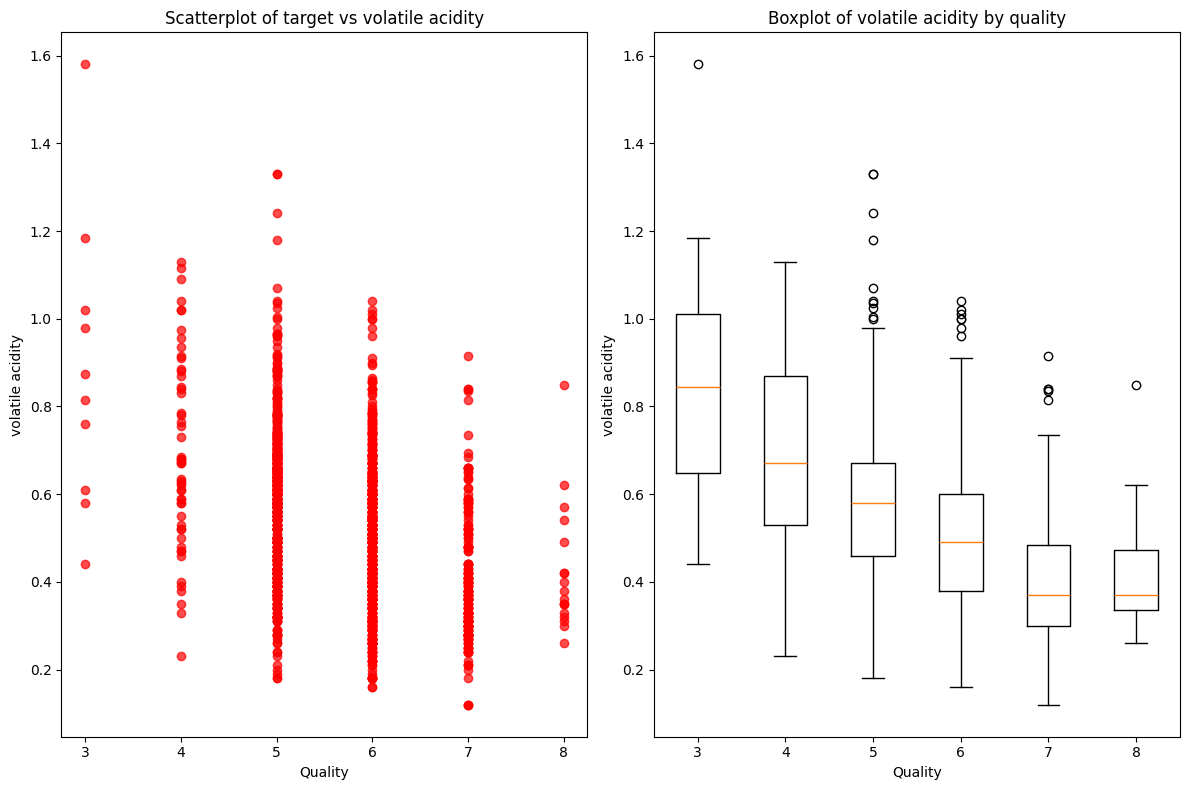

In [15]:
plt.figure(figsize = (12,8))

plt.subplot(1,2,1)

plt.scatter(wine_df["target"],wine_df["volatile acidity"],  color = "red", alpha = 0.7)
plt.title("Scatterplot of target vs volatile acidity")
plt.xlabel("Quality")
plt.ylabel("volatile acidity")

plt.subplot(1,2,2)

grouped_info = [wine_df[wine_df["target"] == i]["volatile acidity"] for i in sorted(wine_df["target"].unique())]
plt.boxplot(grouped_info, tick_labels = sorted(wine_df["target"].unique()))
plt.title("Boxplot of volatile acidity by quality")
plt.xlabel("Quality")
plt.ylabel("volatile acidity")

plt.tight_layout()
plt.show()

##### **The above scatter plot and boxplot show a strong negative relationship between volatile acidity and target (quality).**
**a) The scatter plot reveals a downward trend, which indicates to us that higher quality of wine tend to have lower volatile acidity.**

**b) The boxplot even further proves this pattern as we can clearly see that higher quality wine (7 and 8) have a tight, lower median volatile acidity content (0.4), showing very little variation compared to lower quality wine.**

**c) Lower quality wines appear across a wider range of volatile acidity, which suggests that higher volatile acidity is common in poor quality wines.**

### **3) Dataset Imbalance**

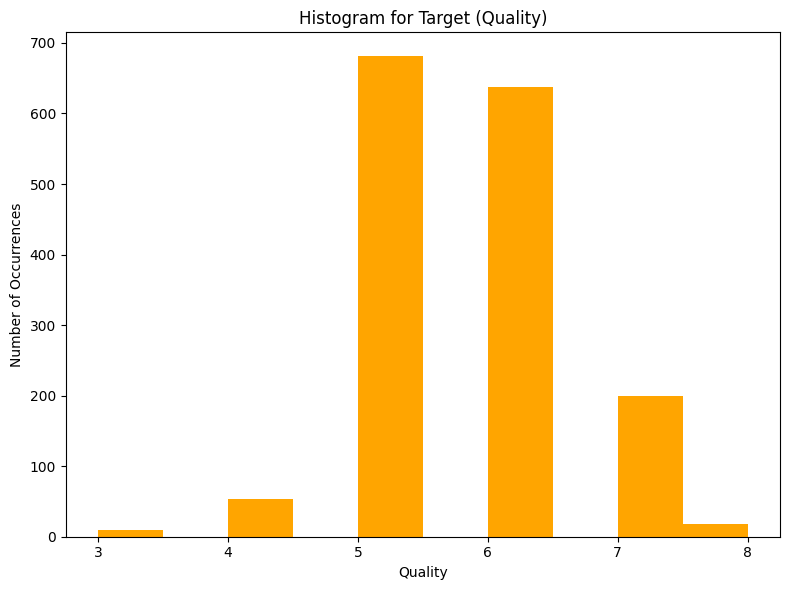

In [16]:
plt.figure(figsize = (8,6))
plt.hist(wine_df["target"], color = "orange")
plt.title("Histogram for Target (Quality)")
plt.xlabel("Quality")
plt.ylabel("Number of Occurrences")
plt.tight_layout()
plt.show()


**a) The data given has an imbalance as there are almost 1400 wines rated 5 and 6 (out of 1599), while less than 20 wines rated 3 or 8.**

**b) Calculating accuracy would be a misleading metric, as any naive model that always predicts a rating of "5" would acheive an accuracy of 50% without learning anything meaningful about wine quality.**

**c) Hence, this could change how we should evaluate models and which metrics are meaningful.**

### **4) Correlation Heatmap**

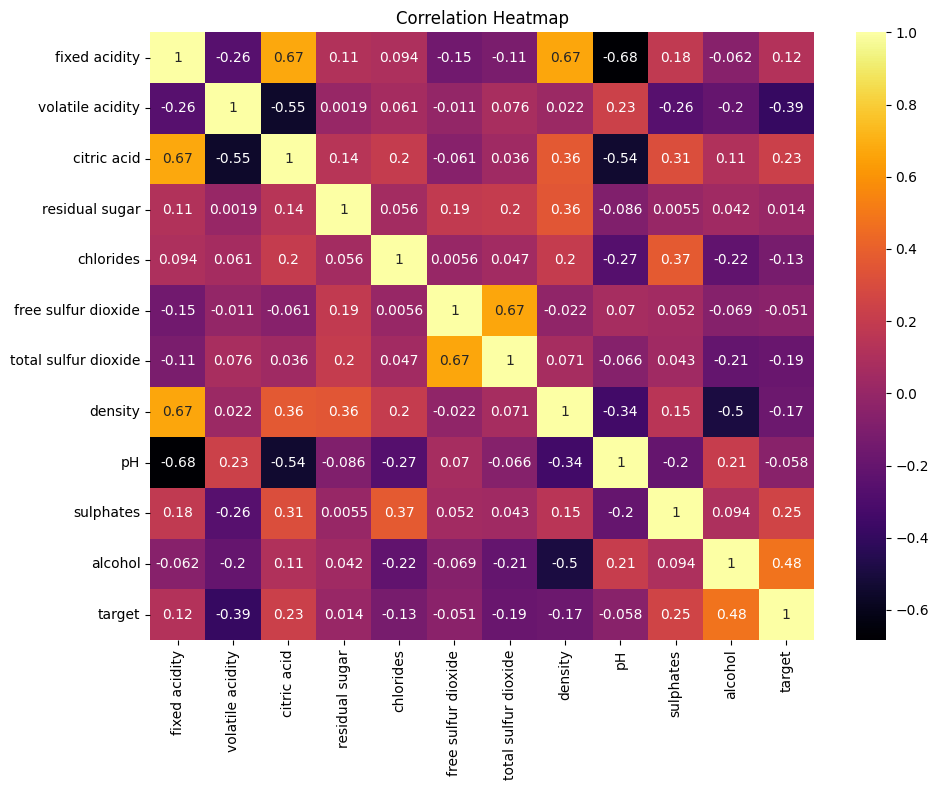

In [17]:
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = "inferno")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##### **The correlation heatmap provides a clear view of how all the chemical properties in the data relate to one another.**
**a) Quality and alcohol have a strong positive relationship.**

**b) Quality and volatile acidity have a strong negative relationship.**

**c) Denser wines tend to have higher fixed acidity.**

**d) Heatmap helps summarize the entire structure of the dataset and helps find feature clusters which helps in future modelling.**

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

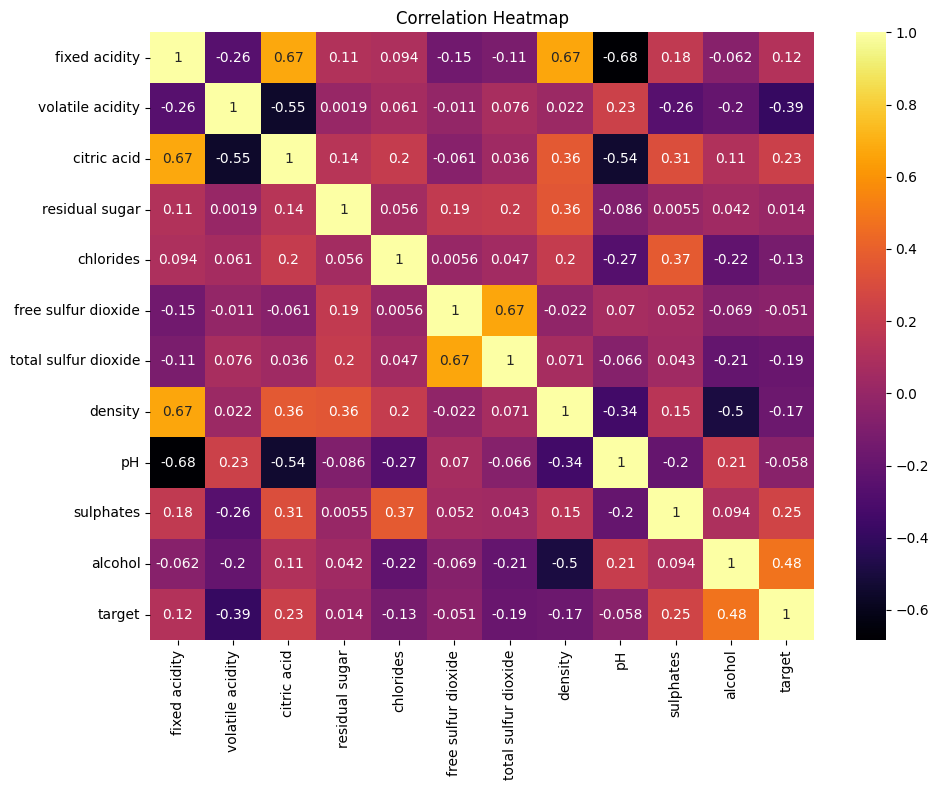

In [18]:
# Correlation matrix and Heatmap

corr_matrix = wine_df.corr(numeric_only = True)

plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = "inferno")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [19]:
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


##### Most Negatively Correlated Pair = Fixed Acidity and pH (-0.682978)

##### Most Positively Correlated Pair = Fixed Acidity and Citric Acid (0.671703)

##### Since, for most correlated we need to consider the absolute value of correlation coefficient, the most related pair is **Fixed Acidity and pH (-0.682978)**.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

### The three different regression models:

**1) <ins>Linear Regression**</ins>

scikit-learn link = https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Web Page = https://www.kaggle.com/code/andyxie/beginner-scikit-learn-linear-regression-tutorial

**2) <ins>Support Vector Regression (SVR)**</ins>

scikit-learn link = https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

Web Page = https://www.geeksforgeeks.org/machine-learning/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/


**3) <ins>Gradient Boosting Regressor**</ins>

scikit-learn link = https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

Web Page = https://towardsdatascience.com/gradient-boosting-regressor-explained-a-visual-guide-with-code-examples-c098d1ae425c/


### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [20]:
# Getting Data Ready

x = wine_df.drop(columns = "target")
y = wine_df["target"]

In [21]:
# Linear Regression Model

model_lr_p6 = sklearn.linear_model.LinearRegression()
model_lr_p6.fit(x,y)
lr_preds_p6 = model_lr_p6.predict(x)

lr_preds_p6

array([5.03285045, 5.13787975, 5.20989474, ..., 5.94304255, 5.47075621,
       6.00819633], shape=(1599,))

In [22]:
# SVR
from sklearn.svm import SVR

model_svr_p6 = SVR(gamma = "scale", kernel = "rbf")
model_svr_p6.fit(x,y)
svr_preds_p6 = model_svr_p6.predict(x)

svr_preds_p6

array([5.48346481, 5.37267628, 5.35522543, ..., 6.00393896, 5.85107294,
       5.78124079], shape=(1599,))

In [23]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

model_gb_p6 = GradientBoostingRegressor(n_estimators = 200, random_state = 60)
model_gb_p6.fit(x,y)
gb_preds_p6 = model_gb_p6.predict(x)

gb_preds_p6

array([5.00564803, 5.23626288, 5.37457847, ..., 5.97137325, 5.66776543,
       6.08669059], shape=(1599,))

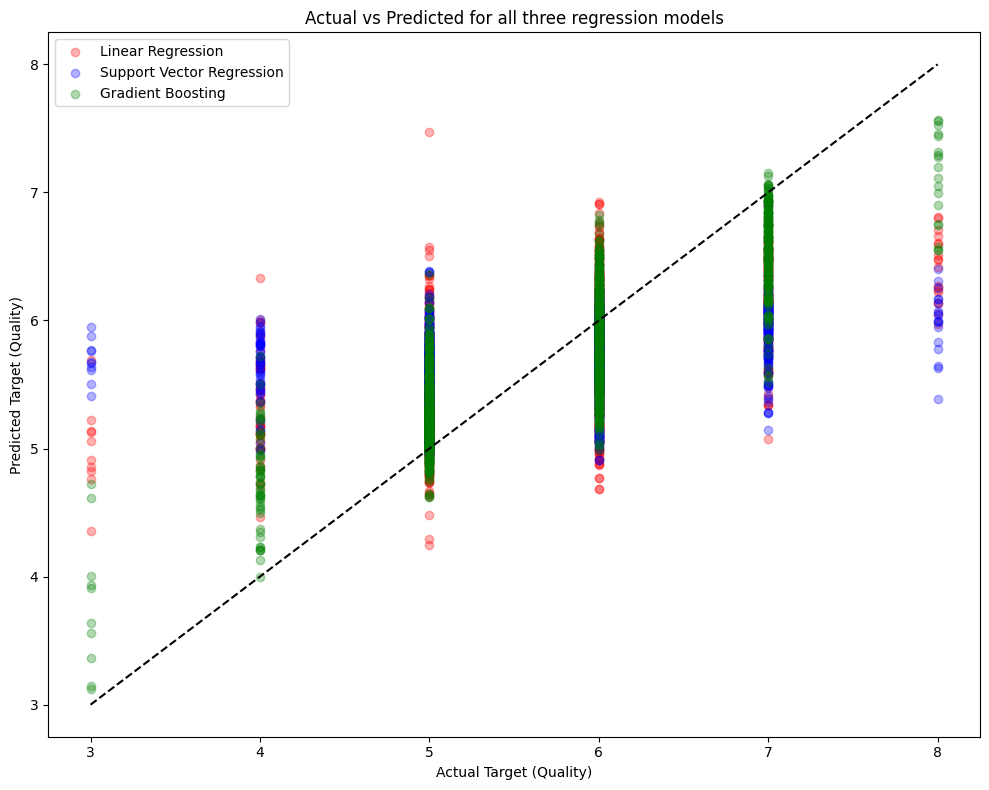

In [24]:
# Plot Actual vs Predicted

plt.figure(figsize = (10,8))
plt.scatter(y, lr_preds_p6, color = "red", alpha = 0.3, label = "Linear Regression")
plt.scatter(y, svr_preds_p6, color = "blue", alpha = 0.3, label = "Support Vector Regression")
plt.scatter(y, gb_preds_p6, color = "green", alpha = 0.3, label = "Gradient Boosting")
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle = "--", color = "black")
plt.title("Actual vs Predicted for all three regression models")
plt.xlabel("Actual Target (Quality)")
plt.ylabel("Predicted Target (Quality)")
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# L1 and L2 losses for Linear Regression

l1_lr_p6 = np.mean(np.abs(y - lr_preds_p6))
l2_lr_p6 = np.mean((y - lr_preds_p6)**2)

print("LINEAR REGRESSION")
print("L1 loss :", l1_lr_p6)
print("L2 loss :", l2_lr_p6)

LINEAR REGRESSION
L1 loss : 0.5004899635644883
L2 loss : 0.41676716722140794


In [26]:
# L1 and L2 losses for SVR

l1_svr_p6 = np.mean(np.abs(y - svr_preds_p6))
l2_svr_p6 = np.mean((y - svr_preds_p6)**2)

print("Support Vector Regression")
print("L1 loss :", l1_svr_p6)
print("L2 loss :", l2_svr_p6)

Support Vector Regression
L1 loss : 0.546300469648466
L2 loss : 0.523093075172372


In [27]:
# L1 and L2 losses for Gradient Boosting

l1_gb_p6 = np.mean(np.abs(y - gb_preds_p6))
l2_gb_p6 = np.mean((y - gb_preds_p6)**2)

print("GRADIENT BOOSTING")
print("L1 loss :", l1_gb_p6)
print("L2 loss :", l2_gb_p6)

GRADIENT BOOSTING
L1 loss : 0.3410632983674537
L2 loss : 0.19209375414171764


##### **1) <ins>Linear Regression**</ins>

**L1 Loss** : 0.5004899635644883

**L2 Loss** : 0.41676716722140794

##### **2) <ins>Support Vector Regression**</ins>

**L1 Loss** : 0.546300469648466

**L2 Loss** : 0.523093075172372

##### **3) <ins>Gradient Boosting**</ins>

**L1 Loss** : 0.3410632983674537

**L2 Loss** : 0.19209375414171764

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [28]:
# Getting data ready

x_p7 = wine_df.drop(columns = "target")
y_p7 = wine_df["target"]

In [29]:
# Cross Validation for Linear Regression

from sklearn.model_selection import cross_validate

model_lr_p7 = sklearn.linear_model.LinearRegression()

cv_lr_p7 = cross_validate(model_lr_p7, x_p7, y_p7, cv = 5, scoring = "neg_mean_squared_error")                          

In [30]:
l2_lr_cv = -np.mean(cv_lr_p7["test_score"])

print("LINEAR REGRESSION")
print("L2 Loss (cross validation):" , l2_lr_cv)
print("L2 Loss (Whole Dataset):", l2_lr_p6)

LINEAR REGRESSION
L2 Loss (cross validation): 0.4366293880320982
L2 Loss (Whole Dataset): 0.41676716722140794


In [31]:
# Cross Validation for SVR

model_svr_p7 = SVR(gamma = "scale", kernel = "rbf")

cv_svr_p7 = cross_validate(model_svr_p7, x_p7, y_p7, cv = 5, scoring = "neg_mean_squared_error") 

In [32]:
l2_svr_cv = -np.mean(cv_svr_p7["test_score"])

print("SVR")
print("L2 Loss (cross validation):" , l2_svr_cv)
print("L2 Loss (Whole Dataset):", l2_svr_p6)

SVR
L2 Loss (cross validation): 0.5665268169081763
L2 Loss (Whole Dataset): 0.523093075172372


In [33]:
# Cross Validation for Gradient Boosting

model_gb_p7 = GradientBoostingRegressor(n_estimators = 200, random_state = 60)

cv_gb_p7 = cross_validate(model_gb_p7, x_p7, y_p7, cv = 5, scoring = "neg_mean_squared_error") 

In [34]:
l2_gb_cv = -np.mean(cv_gb_p7["test_score"])

print("GRADIENT BOOST")
print("L2 Loss (cross validation):" , l2_gb_cv)
print("L2 Loss (Whole Dataset):", l2_gb_p6)

GRADIENT BOOST
L2 Loss (cross validation): 0.4346135986261356
L2 Loss (Whole Dataset): 0.19209375414171764


### **COMPARISON**

##### **1) <ins>Linear Regression**</ins>

**Whole Dataset L2 Loss** : 0.41676716722140794

**Cross Validation L2 Loss** : 0.4366293880320982

**Difference** : Approximately +0.02 (very little)

There is a small increase in L2 loss under due to minimal overfitting. Linear Regression is a low variance and stable model, the small gap is due to sampling variation.

##### **2) <ins>Support Vector Regression**</ins>

**Whole Dataset L2 Loss** : 0.523093075172372

**Cross Validation L2 Loss** : 0.5665268169081763

**Difference** : Approximately +0.044 (moderate)

SVR shows a moderate increase in L2 loss. This is because SVR is flexible which results in moderate overfitting.

##### **3) <ins>Gradient Boosting**</ins>

**Whole Dataset L2 Loss** : 0.19209375414171764

**Cross Validation L2 Loss** : 0.4346135986261356

**Difference** : Approximately +0.243 (huge difference)

Gradient Boosting shows a huge increase in L2 loss. This is because of substantial overfitting, and gradient boost model needs to be properly tuned.

##### **For all the three models, the cross validated L2 scores are higher than the L2 scores computed on the full dataset, which demonstrates that lower whole dataset errors were due to overfitting, with Linear Regression having smallest gap and Gradient boosting the largest.**

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [35]:
# Import and getting data ready

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

x_p8 = wine_df.drop(columns = "target")
y_p8 = wine_df["target"]

In [36]:
# Pipeline for Linear Regression

pipeline_lr = make_pipeline(StandardScaler(), sklearn.linear_model.LinearRegression())
pipeline_lr.fit(x_p8, y_p8)
lr_preds_pipeline = pipeline_lr.predict(x_p8)

l2_lr_pipeline = np.mean((y_p8 - lr_preds_pipeline)**2)

In [37]:
print("LINEAR REGRESSION (STANDARDIZED)")
print("L2 Loss (Standardized):" , l2_lr_pipeline)
print("L2 Loss (Problem 6)", l2_lr_p6)

LINEAR REGRESSION (STANDARDIZED)
L2 Loss (Standardized): 0.41676716722140805
L2 Loss (Problem 6) 0.41676716722140794


In [38]:
# Pipeline for SVR

pipeline_svr = make_pipeline(StandardScaler(), SVR(gamma = "scale", kernel = "rbf"))
pipeline_svr.fit(x_p8, y_p8)
svr_preds_pipeline = pipeline_svr.predict(x_p8)

l2_svr_pipeline = np.mean((y_p8 - svr_preds_pipeline)**2)

In [39]:
print("SVR (STANDARDIZED)")
print("L2 Loss (Standardized):" , l2_svr_pipeline)
print("L2 Loss (Problem 6)", l2_svr_p6)

SVR (STANDARDIZED)
L2 Loss (Standardized): 0.29743693810524713
L2 Loss (Problem 6) 0.523093075172372


In [40]:
# Pipeline for Gradient Boosting

pipeline_gb = make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators = 200, random_state = 60))
pipeline_gb.fit(x_p8, y_p8)
gb_preds_pipeline = pipeline_gb.predict(x_p8)

l2_gb_pipeline = np.mean((y_p8 - gb_preds_pipeline)**2)

In [41]:
print("Gradient Boost (STANDARDIZED)")
print("L2 Loss (Standardized):" , l2_gb_pipeline)
print("L2 Loss (Problem 6)", l2_gb_p6)

Gradient Boost (STANDARDIZED)
L2 Loss (Standardized): 0.19209375414171764
L2 Loss (Problem 6) 0.19209375414171764


### **COMPARISON**

##### **1) <ins>Linear Regression**</ins>

**Standardized L2 Loss** : 0.41676716722140805

**Problem 6 L2 loss** : 0.41676716722140794

**Difference** : Almost None

The standardized models predictions remain almost identical to previous model, so L2 loss remains the same.

##### **2) <ins>Support Vector Regression**</ins>

**Standardized L2 Loss** : 0.29743693810524713

**Problem 6 L2 loss** : 0.523093075172372

**Difference** : Approximately -0.2256 (Big Improvement)

SVR is sensitive to scaling of features becuase of rbf kernel. Standardization improves the performance, hence why L2 loss is reduced by almost half.

##### **3) <ins>Gradient Boosting**</ins>

**Standardized L2 Loss** : 0.19209375414171764

**Problem 6 L2 loss** : 0.19209375414171764

**Difference** : No Change

Gradient Boosting showed no effect to standardization. L2 loss remains the same.

##### **A change in L2 loss after standardization was only seen in the SVR model, while the Linear Regression and Gradient Boosting produced the same L2 loss as in problem 6.**

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

#### **It is not a reliable strategy to randomly train thousand depth limited trees, because without a structured way to choose model settings you are mostly generating uninformative variation that cross validation cannot turn into better models, and it is more effective to tune a single model like gradient boost with proper validation.**

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

### BEST MODEL : GRADIENT BOOSTING (WITHOUT STANDARDIZATION)

### Criteria

##### **1) Lowest full data MSE:**

Gradient Boost had an L2 loss of 0.192, which was less than half of Linear Regression (0.416) and much less than SVR (0.523).

#### **2) 5 Fold Cross Validation :**

Although its CV L2 (0.434) is slighly higher than its full data error, it is still very comparable with Linear Regression and significantly outperforms Support Vector Regression.

##### **3) Perfect Choice for Red Wine Dataset:**

a) The dataset has complex non linear relationships among the physiochemical features (e.g. Higher alcohol leads to higher quality)

b) In most cases, tree based models like Gradient Boost excel in understanding these non linear relationships.

c) Gradient Boost is good at handling outliers if present.

##### **4) Standardization is not required for tree based models. So, it is better to choose the Gradient Boost model without standardization.**

### Why Others Not Selected

##### **1) Linear Regression**

a) Much worse full data MSE (0.416 for Linear Regression compared to 0.192 for Gradient Boost).

b) Fails to fully capture the non linear relationships in the dataset.

c) Slightly worse Cross validation score.

##### **2) Support Vector Regression**

a) Very high cross validation score (0.56).

b) Even with a strong standardization for SVR, it is still worse than Gradient Boost.

### **After evaluating all models with 5 fold cross validation and standardization, Gradient Boost achieved the best MSE scores across all the tests (full data, 5 fold cv and standardization). Since, tree based methods don't benefit from standardization, it is better to choose the Gradient Boost non standardized model. It outperforms Linear Regression by a small margin and SVR by a huge margin, which is expected given that there are non linear interactions and relationships present in the wine dataset. Hence, Gradient Boost is the best model (among those I have tested) for the Red wine Dataset.**